In [2]:
from brian2 import *
%matplotlib inline

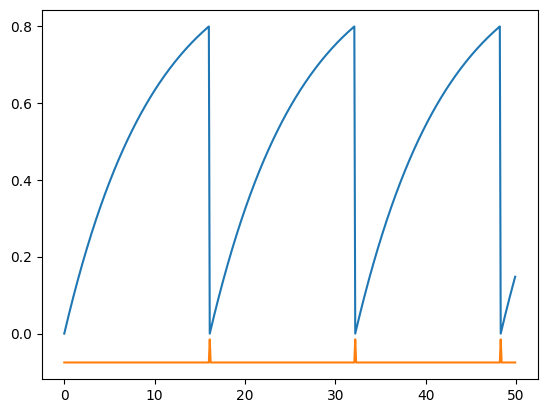

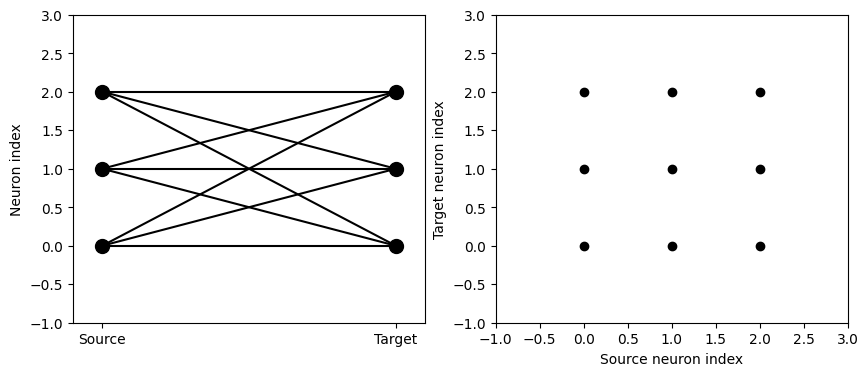

In [25]:
start_scope()
tau=10*ms

eqs_1 = '''
dv/dt = (1-v)/tau : 1
'''
eqs_2 = Equations('dv/dt = (((v+0.075)*(v+0.045))-u)/(150*tau):1 ')
eqs_2 += Equations('du/dt = (0.01*(5*(v+0.075)-u))/tau:1 ')

G_1 = NeuronGroup(3, eqs_1, threshold='v>0.8', reset='v = 0', method='exact')
G_2 = NeuronGroup(3, eqs_2, threshold='v>-0.045', reset='v = -0.075', method='euler')
G_2.v= -0.075


w = 0.02
S = Synapses(G_1, G_2, on_pre='v += w')
S.connect()



M_1 = StateMonitor(G_1, 'v', record=True)  # all synapses originating from neuron 0
M_2 = StateMonitor(G_2, 'v', record = True)
run(50*ms)

plot(M_1.t / ms, M_1.v[0])
plot(M_2.t / ms, M_2.v[0])


def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(S)

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


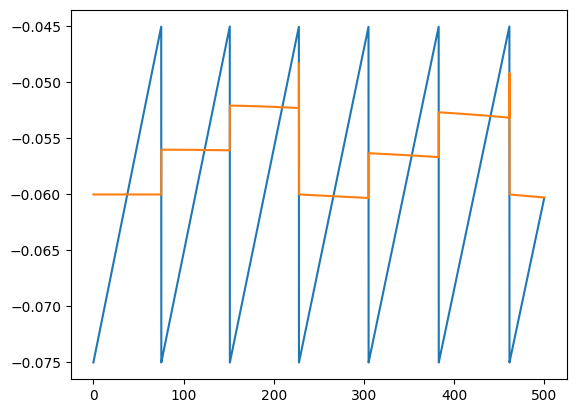

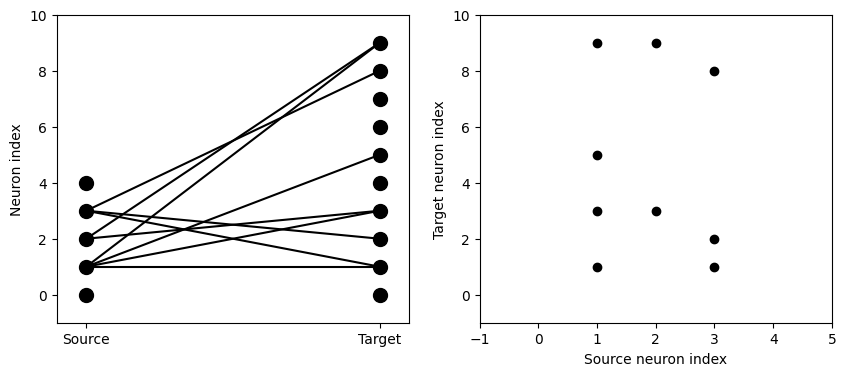

In [3]:
start_scope()
tau=10*ms
eqs_1 = Equations('dv/dt = (((v+0.075)*(v+0.045))-u+0.6)/(150*tau):1 ')
eqs_1 += Equations('du/dt = (0.01*(5*(v+0.075)-u))/tau:1 ')

eqs_2 = Equations('dv/dt = ((3*(v+0.06)*(v+0.05))-u)/(100*tau):1')
eqs_2 += Equations('du/dt = (0.01*(5*(v+0.06)-u))/tau:1 ')

G_1 = NeuronGroup(5, eqs_1, threshold='v>-0.045', reset='v = -0.075', method='euler')
G_1.v=-0.075

G_2 = NeuronGroup(10, eqs_2, threshold='v>-0.05', reset='v = -0.06',  method='euler')
G_2.v=-0.06

w = 0.002
S = Synapses(G_1, G_2, on_pre='v += w')
S.connect(p=0.25)

M_1 = StateMonitor(G_1, 'v', record=True)  
M_2 = StateMonitor(G_2, 'v', record = True)
run(500*ms)


plot(M_1.t / ms, M_1.v[3])
plot(M_2.t / ms, M_2.v[3])


def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(S)

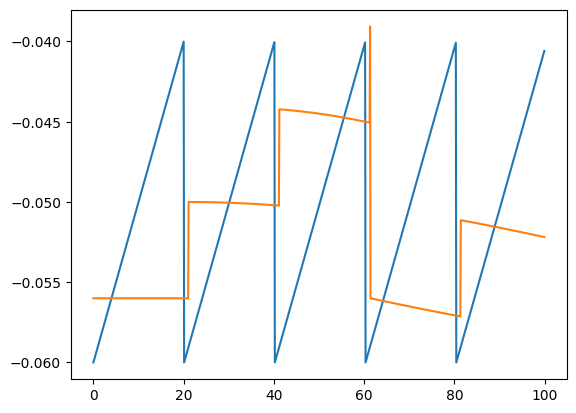

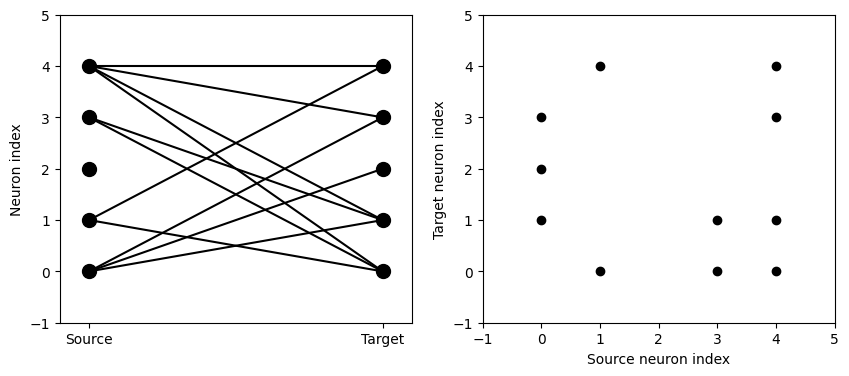

In [76]:
start_scope()
tau_1=10*ms
tau_2=5*ms

eqs_1 = Equations('dv/dt = ((1.5*(v+0.06)*(v+0.04))-u+0.5)/(50*tau_1):1 ')
eqs_1 += Equations('du/dt = (0.03*((v+0.06)-u))/tau_1:1 ')

eqs_2 = Equations('dv/dt = (((v+0.056)*(v+0.042))-u)/(100*tau_2/2):1  ')
eqs_2 += Equations('du/dt = (0.03*(8*(v+0.056)-u))/tau_2:1 ')

G_1 = NeuronGroup(5, eqs_1, threshold='v>-0.04', reset='v = -0.06', method='euler')
G_1.v=-0.06

G_2 = NeuronGroup(5, eqs_2, threshold='v>-0.042', reset='v = -0.056',  method='euler')
G_2.v=-0.056


S = Synapses(G_1, G_2, 'w:1', on_pre='v += w')
S.connect(p=0.5)
S.w=0.002
S.delay=1*ms

M_1 = StateMonitor(G_1, 'v', record=True)  
M_2 = StateMonitor(G_2, 'v', record = True)
run(100*ms)


plot(M_1.t / ms, M_1.v[0])
plot(M_2.t / ms, M_2.v[0])


def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(S)

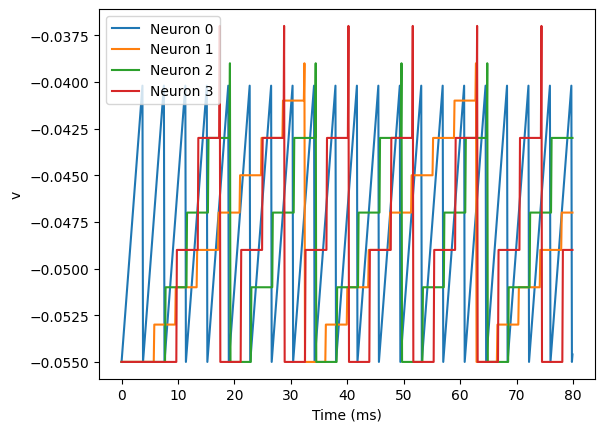

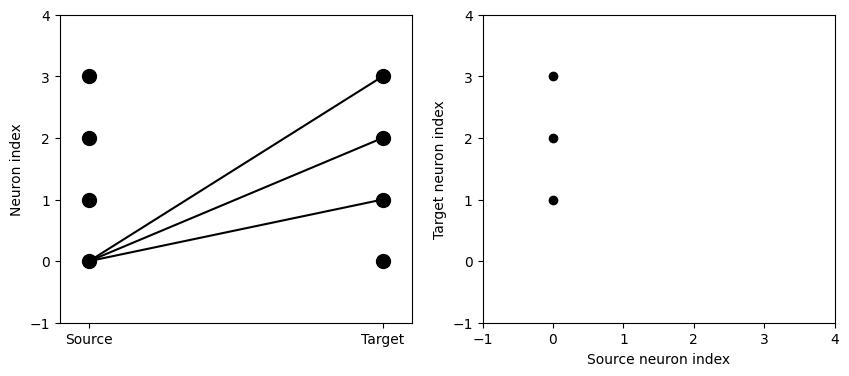

In [70]:
start_scope()


eqs = Equations('dv/dt = ((v+0.055)*(v+0.040)-u+I)/(20*tau):1 ')
eqs += Equations('du/dt = (0.02*(-u))/tau:1 ')
eqs += Equations('I:1')
eqs += Equations('tau:second')


G = NeuronGroup(4, eqs, threshold='v>-0.040', reset='v = -0.055', method='euler')
G.v=-0.055

G.I = [0.8, 0, 0, 0]
G.tau = [10, 100, 100, 100]*ms

S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=[0], j=[1, 2, 3])
S.w = 'j*0.002'
S.delay = 'j*2*ms'

M = StateMonitor(G, 'v', record=True)

run(80*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
plot(M.t/ms, M.v[3], label='Neuron 3')
xlabel('Time (ms)')
ylabel('v')
legend();

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(S)
